In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

## Load The Dataset

In [2]:
data=pd.read_csv('housing.csv')
df=pd.DataFrame(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

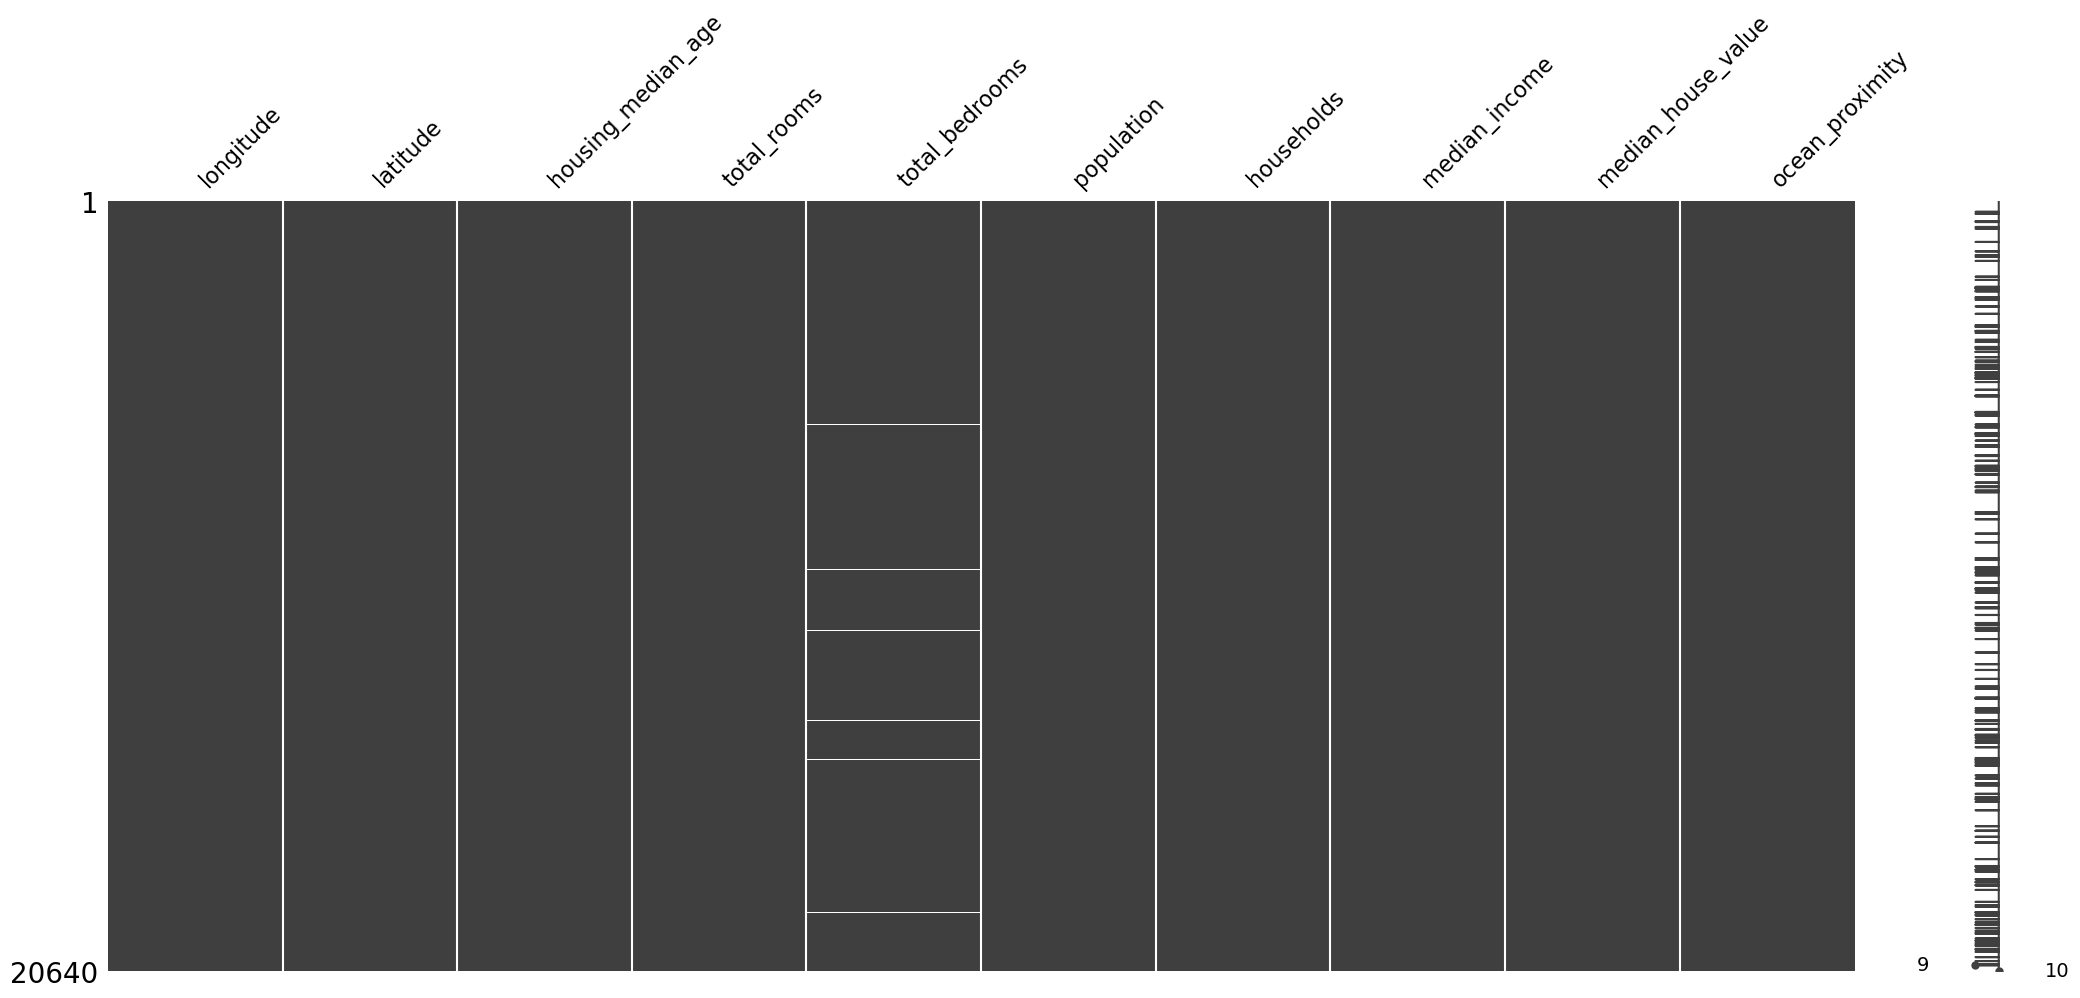

In [7]:
msno.matrix(df)

## I noticed that there are 207 null values in total_bedrooms so I will deal with them.

In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Text(0.5, 0, ' ')

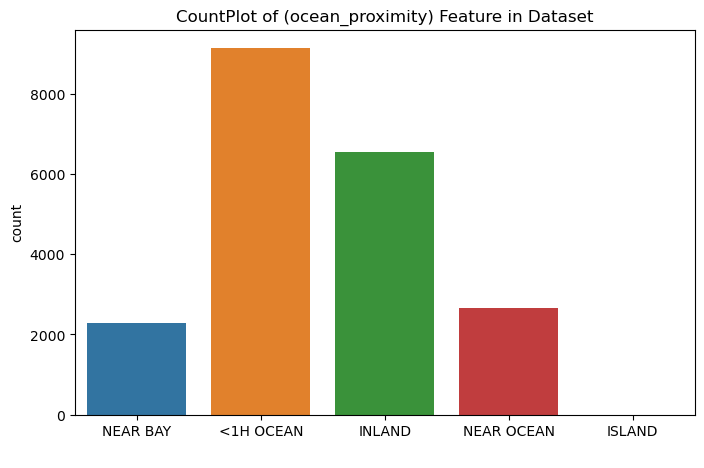

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['ocean_proximity'])
plt.title('CountPlot of (ocean_proximity) Feature in Dataset')
plt.xlabel(" ")

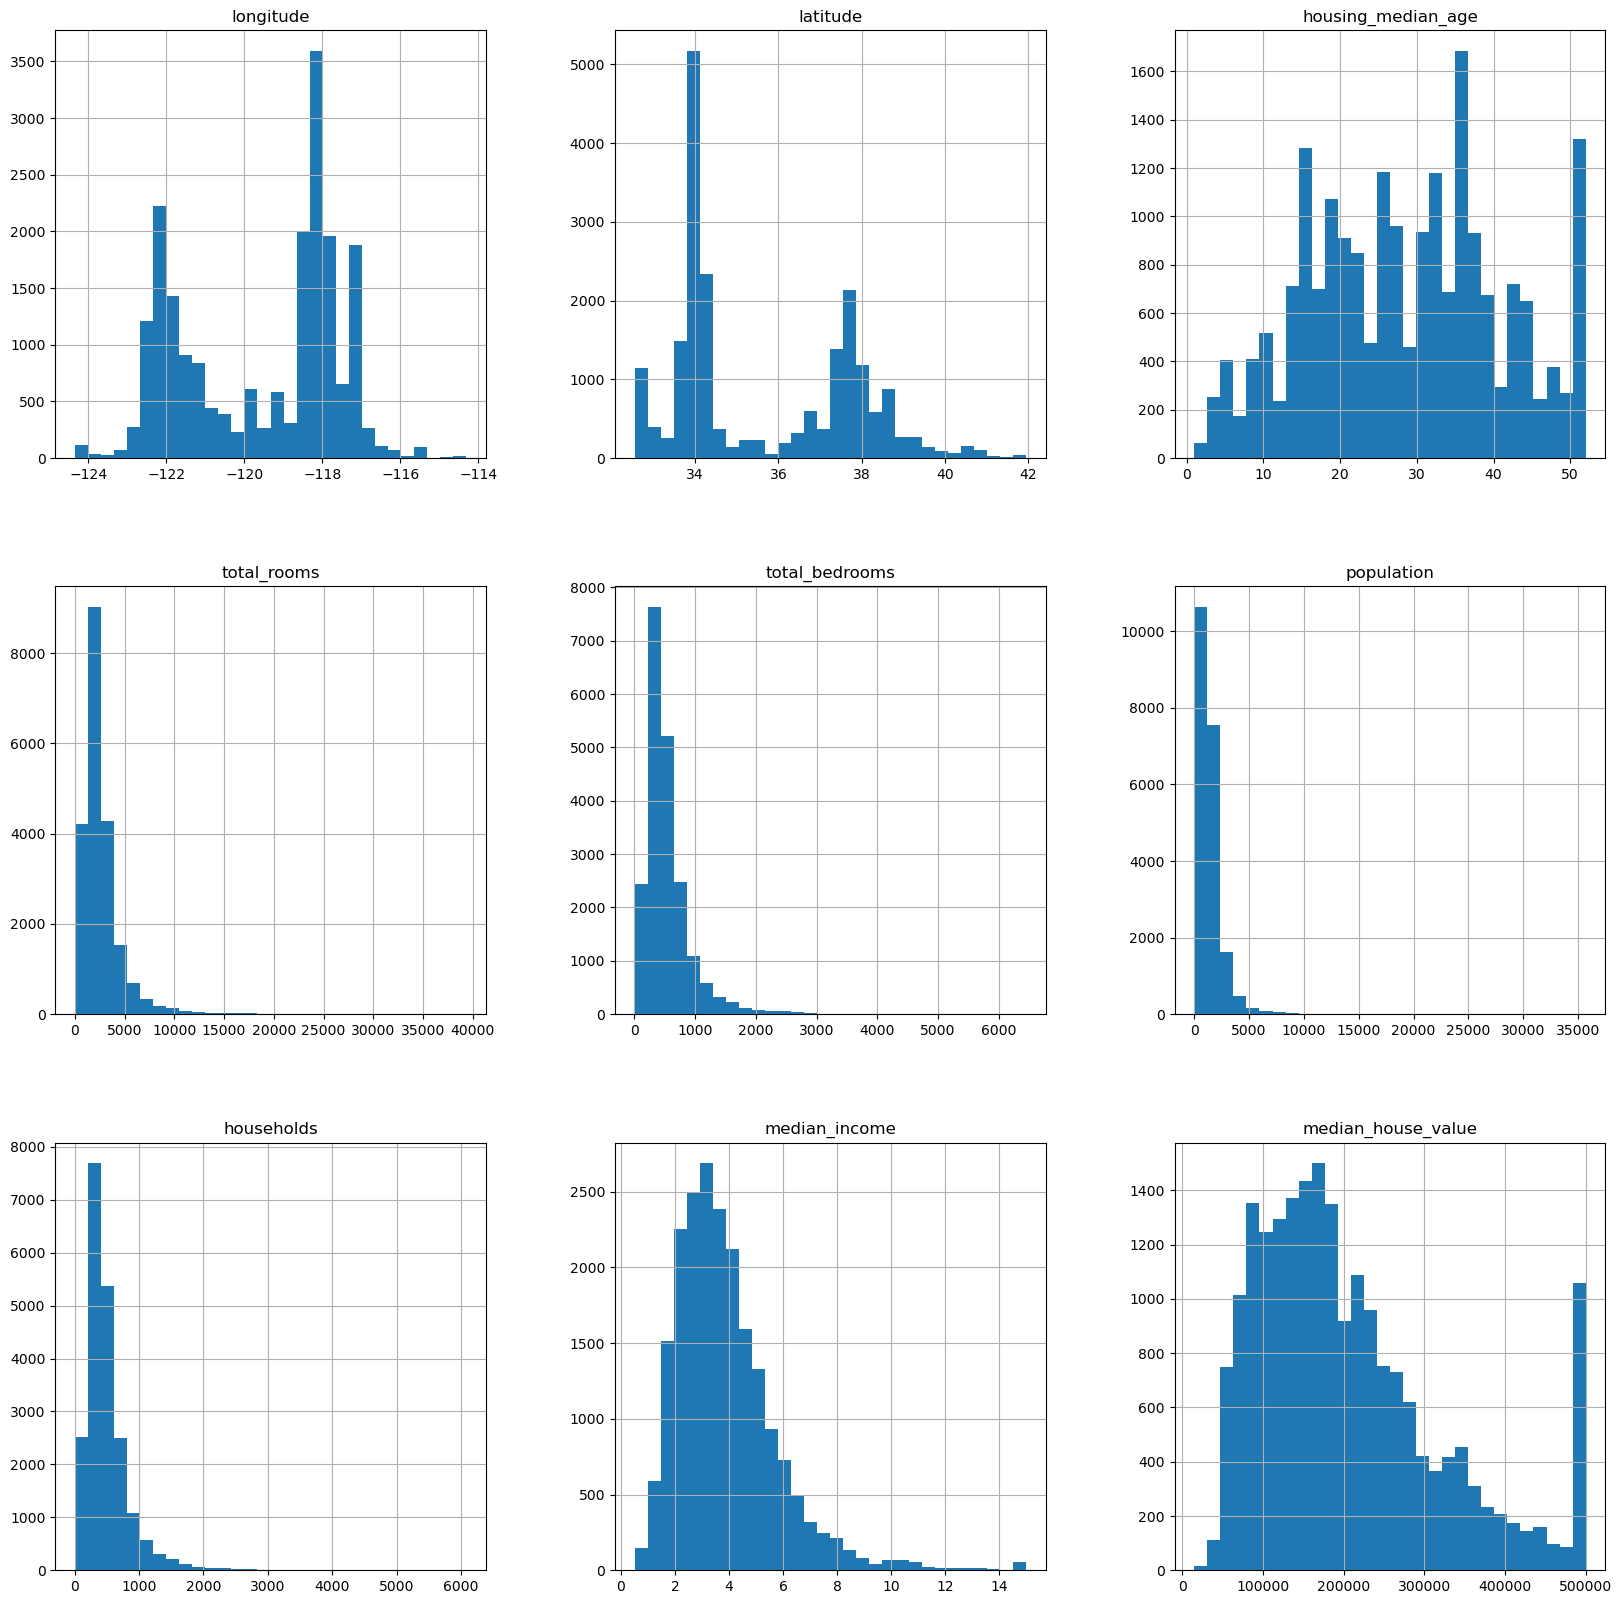

In [10]:
df.hist(figsize=(20,20),bins=30)
plt.show()

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

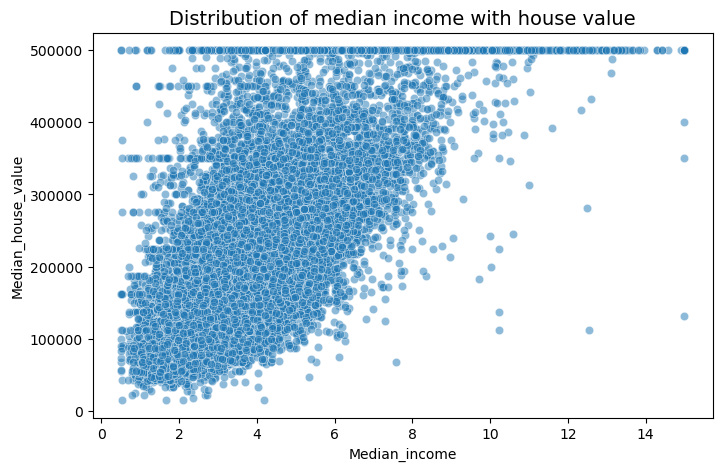

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['median_income'],y=df['median_house_value'],alpha=0.5)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median_income')
plt.ylabel('Median_house_value')
plt.show()

C:\Users\MTAMER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


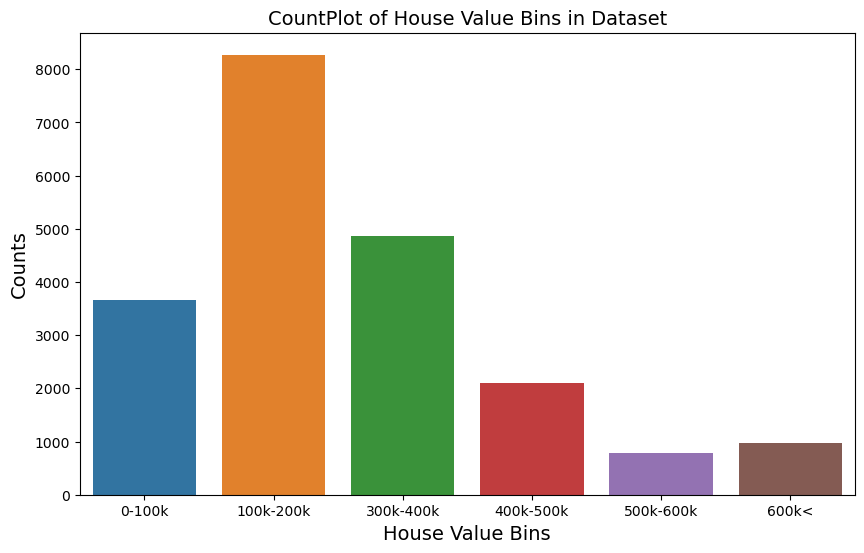

In [13]:
house_value_bins = pd.cut(x=df['median_house_value'], 
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf], 
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

C:\Users\MTAMER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


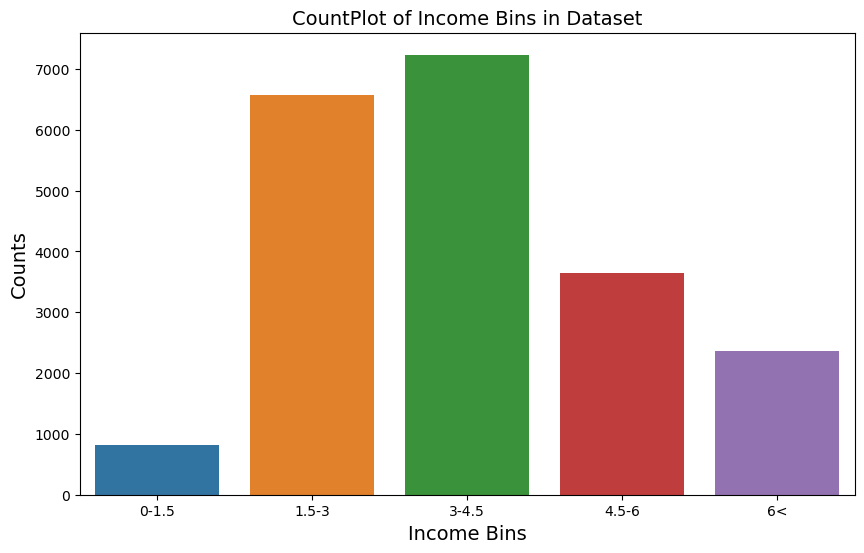

In [14]:
income_bins = pd.cut(x=df['median_income'], 
                          bins=[0, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 

<Axes: >

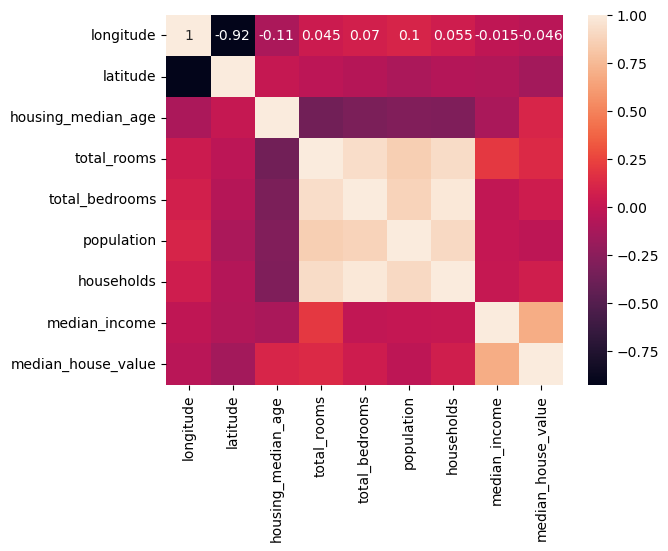

In [15]:
cor=df.select_dtypes(include=[np.number]).corr()
sns.heatmap(cor,annot=True)

In [16]:
cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


df.select_dtypes(include=[np.number]).corr()['median_house_value'].sort_values(ascending=False)

## Dealing with nulls


In [17]:
SI=SimpleImputer(strategy='median')
df['total_bedrooms']=SI.fit_transform(df[['total_bedrooms']])

## Encoding  Categorical Features

In [18]:
LE =LabelEncoder()
df['ocean_proximity']=LE.fit_transform(df['ocean_proximity'])

## Scaling the Dataset


In [19]:
scaler = MinMaxScaler(feature_range = (0,1))
DF1 = df.drop(columns=['median_house_value'])
norm = scaler.fit_transform(df)
norm_df = pd.DataFrame(norm,columns=df.columns)

In [20]:
X = pd.DataFrame(norm_df.drop(columns='median_house_value'))
Y = pd.DataFrame(norm_df.median_house_value).values.reshape(-1, 1)

## Split the Dataset

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [22]:
X = df.drop(columns=['median_house_value'], axis=1)   
y = df['median_house_value'] 

## LinearRegression

In [23]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_LR=LR.predict(X_test)

In [24]:
r2 = r2_score(y_test, y_pred_LR)
rmse =np.sqrt(mean_squared_error(y_test, y_pred_LR))
print('Rmse: ',rmse)
print('r2_score: ',r2)


Rmse:  0.14669603725589533
r2_score:  0.6137068886499536


## SGDRegression


In [25]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.001, shuffle=True, max_iter=10000)  
sgd_reg.fit(X_train,y_train)
y_pred_sgd_reg=sgd_reg.predict(X_test)

C:\Users\MTAMER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
r2 = r2_score(y_test, y_pred_sgd_reg)
rmse =np.sqrt(mean_squared_error(y_test, y_pred_sgd_reg))
print('Rmse: ',rmse)
print('r2_score: ',r2)

Rmse:  0.21531647012720131
r2_score:  0.16778660476465745


## RandomForest

In [27]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred_RF=RF.predict(X_test)

C:\Users\MTAMER\AppData\Local\Temp\ipykernel_8736\3482057907.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


In [28]:
r2 = r2_score(y_test, y_pred_RF)
rmse =np.sqrt(mean_squared_error(y_test, y_pred_RF))
print('Rmse: ',rmse)
print('r2_score: ',r2)

Rmse:  0.10246571262509609
r2_score:  0.8115321272566725


## ANN

In [29]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [ ]:
r = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    batch_size=128,
    epochs=500
)

Epoch 1/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0790 - val_loss: 0.0229
Epoch 2/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 - val_loss: 0.0215
Epoch 3/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - val_loss: 0.0204
Epoch 4/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 - val_loss: 0.0199
Epoch 5/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207 - val_loss: 0.0195
Epoch 6/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 - val_loss: 0.0197
Epoch 7/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202 - val_loss: 0.0189
Epoch 8/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 - val_loss: 0.0190
Epoch 9/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - val_loss: 0.0189
Epoch 10/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 - val_loss: 0.0191
Epoch 11/500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0184 - val_loss: 0.0189
Epoch 12/500
129/129 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print('Rmse: ',rmse)
print('r2_score: ',r2)